In [ ]:
#Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plu
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_excel('/content/drive/MyDrive/telcom_data.xlsx')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
df.isnull().sum()

,0
Bearer Id,0
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,1153


In [ ]:
#Handling missing values
for col in df.columns:
  if df[col].dtype == "object":
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

,0
Bearer Id,0
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,0
MSISDN/Number,0
IMEI,0
Last Location Name,0


**Calculating User Engagement Metrics**

**sessions frequency**

**the duration of the session**

**the session total traffic (download and upload (bytes))**


In [ ]:
df['Session Frequency'] = df.groupby(by=['MSISDN/Number'])['Dur. (ms)'].transform('count')

In [ ]:
df['Session Duration'] = df['Dur. (ms)']

In [ ]:
df['Total Traffic'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

**Calculating User Experience Metrics**

**Average TCP retransmission**

**Average RTT**

**Handset type**

**Average throughput**


In [ ]:
#Calculating average TCP retransmission
df['Avg TCP Retrans'] = df[['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']].mean(axis=1)

#Calculating average RTT
df['Avg RTT'] = df[['Avg RTT DL (ms)','Avg RTT UL (ms)']].mean(axis=1)

#Calculating average Throughput
df['Avg Throughput'] = df[['Avg Bearer TP DL (kbps)'  , 'Avg Bearer TP UL (kbps)']].mean(axis=1)

In [ ]:
#Creating a new DataFrame with customer aggregating information
agg_df = df.groupby(by=['MSISDN/Number']).agg({
    "Session Frequency": "first",
    "Session Duration": "sum",
    "Total Traffic": "sum",
    "Avg TCP Retrans": "mean",
    "Avg RTT": "mean",
    "Handset Type": "first",
    "Avg Throughput": "mean"}).reset_index()

In [ ]:
agg_df.head()

,MSISDN/Number,Session Frequency,Session Duration,Total Traffic,Avg TCP Retrans,Avg RTT,Handset Type,Avg Throughput
0,3.360100e+10,1,116720.0,8.786906e+08,1.078479e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.0
1,3.360100e+10,1,181230.0,1.568596e+08,1.078479e+07,15.500000,Apple iPhone 7 (A1778),49.5
2,3.360100e+10,1,134969.0,5.959665e+08,1.078479e+07,63.729294,undefined,48.5
3,3.360101e+10,1,49878.0,4.223207e+08,3.803623e+05,42.000000,Apple iPhone 5S (A1457),124.0
4,3.360101e+10,2,37104.0,1.457411e+09,7.735101e+06,29.750000,Apple iPhone Se (A1723),14211.0


In [ ]:
agg_df.shape

(106857, 8)

In [ ]:
agg_df.isnull().sum()

,0
MSISDN/Number,0
Session Frequency,0
Session Duration,0
Total Traffic,0
Avg TCP Retrans,0
Avg RTT,0
Handset Type,0
Avg Throughput,0


In [ ]:
elbow_df = agg_df.drop(columns=['Handset Type'])

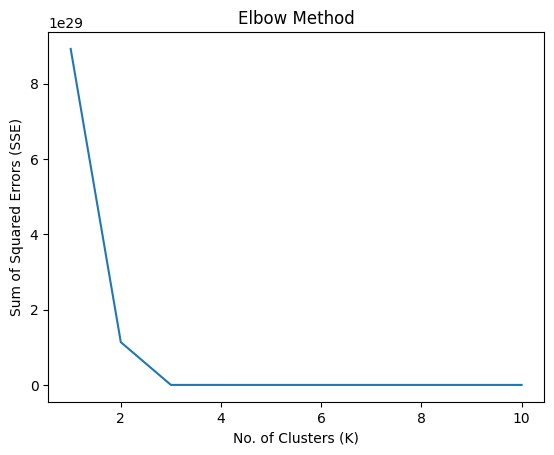

In [ ]:
#Plot elbow method to check the no. of clusters required
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
sse = []  #sse stands for sum of squared errors
for k in range(1,11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(elbow_df)
  sse.append(kmeans.inertia_)

#Plot SSE vs K
plt.plot(range(1,11),sse)
plt.xlabel('No. of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title("Elbow Method")
plt.show()


**Interpretation**

**Before the elbow point, the SSE decreases rapidly, indicating significant improvent in the model's fit. After the elbow point, the SSE decreases gradually, indicating minimal improvement.**

In [ ]:
#Selecting only relevant columns for Satisfaction Analysis
satisfaction_df = agg_df.drop(columns=['Handset Type'])

#Performing KMeans Clustering with k=2
model = KMeans(n_clusters = 2)
model.fit(satisfaction_df)


KMeans(n_clusters=2)

In [ ]:
satisfaction_data = satisfaction_df.copy()
satisfaction_data.to_csv('satisfaction_data.csv', index=False)

In [ ]:
cluster = model.cluster_centers_
cluster

array([[3.68573147e+10, 1.40375833e+00, 1.46837976e+05, 6.95937075e+08,
        1.04237500e+07, 6.73800963e+01, 6.57651787e+03],
       [8.82397108e+14, 1.00000000e+00, 8.69844000e+05, 1.39153646e+08,
        1.07847865e+07, 6.37292945e+01, 1.00000000e+00]])

In [ ]:
labels = model.labels_
labels
centroids = model.cluster_centers_
centroids

array([[3.68573147e+10, 1.40375833e+00, 1.46837976e+05, 6.95937075e+08,
        1.04237500e+07, 6.73800963e+01, 6.57651787e+03],
       [8.82397108e+14, 1.00000000e+00, 8.69844000e+05, 1.39153646e+08,
        1.07847865e+07, 6.37292945e+01, 1.00000000e+00]])

**Task 4. 1 - Write a Python program to assign**

**4.1a Engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)**


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
distances = euclidean_distances(satisfaction_df, centroids)

less_engaged_cluster = 0
engagement_scores = distances[:, less_engaged_cluster]

scaler = MinMaxScaler()
engagement_scores_normalized = scaler.fit_transform(engagement_scores.reshape(-1,1))

agg_df['Engagement Score'] = engagement_scores_normalized

agg_df

,MSISDN/Number,Session Frequency,Session Duration,Total Traffic,Avg TCP Retrans,Avg RTT,Handset Type,Avg Throughput,Engagement Score
0,3.360100e+10,1,1.167200e+05,8.786906e+08,1.078479e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.000000,2.199215e-07
1,3.360100e+10,1,1.812300e+05,1.568596e+08,1.078479e+07,15.500000,Apple iPhone 7 (A1778),49.500000,2.643432e-07
2,3.360100e+10,1,1.349690e+05,5.959665e+08,1.078479e+07,63.729294,undefined,48.500000,2.158519e-07
3,3.360101e+10,1,4.987800e+04,4.223207e+08,3.803623e+05,42.000000,Apple iPhone 5S (A1457),124.000000,2.271298e-07
4,3.360101e+10,2,3.710400e+04,1.457411e+09,7.735101e+06,29.750000,Apple iPhone Se (A1723),14211.000000,3.136688e-07
...,...,...,...,...,...,...,...,...,...
106852,3.379000e+10,1,1.409880e+05,4.803073e+08,1.078479e+07,20.000000,Apple iPhone 8 Plus (A1897),58.000000,8.499325e-09
106853,4.188282e+10,1066,7.255100e+07,5.317447e+11,8.491987e+06,154.561991,undefined,8479.471611,5.984030e-04
106854,3.197021e+12,1,8.773850e+05,2.321240e+08,1.078479e+07,63.729294,Quectel Wireless. Quectel Ec25-E,0.500000,3.578025e-03
106855,3.370000e+14,1,2.530300e+05,5.962878e+08,1.078479e+07,63.729294,Huawei B525S-23A,16.500000,3.818863e-01


**4.1b Experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster.**

In [ ]:
cluster_centroids = centroids

distances = euclidean_distances(satisfaction_df, cluster_centroids)

worst_experience_cluster = cluster_centroids.shape[0] - 1
experience_scores = distances[:, worst_experience_cluster]

scaler = MinMaxScaler()
experience_scores_normalized = scaler.fit_transform(experience_scores.reshape(-1,1))

agg_df['Experience Score'] = experience_scores_normalized

agg_df

,MSISDN/Number,Session Frequency,Session Duration,Total Traffic,Avg TCP Retrans,Avg RTT,Handset Type,Avg Throughput,Engagement Score,Experience Score
0,3.360100e+10,1,1.167200e+05,8.786906e+08,1.078479e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.000000,2.199215e-07,1.000000
1,3.360100e+10,1,1.812300e+05,1.568596e+08,1.078479e+07,15.500000,Apple iPhone 7 (A1778),49.500000,2.643432e-07,1.000000
2,3.360100e+10,1,1.349690e+05,5.959665e+08,1.078479e+07,63.729294,undefined,48.500000,2.158519e-07,1.000000
3,3.360101e+10,1,4.987800e+04,4.223207e+08,3.803623e+05,42.000000,Apple iPhone 5S (A1457),124.000000,2.271298e-07,1.000000
4,3.360101e+10,2,3.710400e+04,1.457411e+09,7.735101e+06,29.750000,Apple iPhone Se (A1723),14211.000000,3.136688e-07,1.000000
...,...,...,...,...,...,...,...,...,...,...
106852,3.379000e+10,1,1.409880e+05,4.803073e+08,1.078479e+07,20.000000,Apple iPhone 8 Plus (A1897),58.000000,8.499325e-09,1.000000
106853,4.188282e+10,1066,7.255100e+07,5.317447e+11,8.491987e+06,154.561991,undefined,8479.471611,5.984030e-04,0.999991
106854,3.197021e+12,1,8.773850e+05,2.321240e+08,1.078479e+07,63.729294,Quectel Wireless. Quectel Ec25-E,0.500000,3.578025e-03,0.996415
106855,3.370000e+14,1,2.530300e+05,5.962878e+08,1.078479e+07,63.729294,Huawei B525S-23A,16.500000,3.818863e-01,0.618109


**Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer**

In [ ]:
#For our bettter understanding/readbility
agg_df['Engagement Score'] = np.log(agg_df['Engagement Score'])
agg_df['Engagement Score'] = agg_df['Engagement Score'].abs()

In [ ]:
#Calculating Satisfaction Score
agg_df['Satisfaction Score'] = (agg_df['Engagement Score']+agg_df['Experience Score'])/2
agg_df['Satisfaction Score'] = np.mod(agg_df['Satisfaction Score'], 1)

In [ ]:
agg_df.head()

,MSISDN/Number,Session Frequency,Session Duration,Total Traffic,Avg TCP Retrans,Avg RTT,Handset Type,Avg Throughput,Engagement Score,Experience Score,Satisfaction Score
0,3.360100e+10,1,116720.0,8.786906e+08,1.078479e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.0,15.329995,1.0,0.164998
1,3.360100e+10,1,181230.0,1.568596e+08,1.078479e+07,15.500000,Apple iPhone 7 (A1778),49.5,15.146018,1.0,0.073009
2,3.360100e+10,1,134969.0,5.959665e+08,1.078479e+07,63.729294,undefined,48.5,15.348673,1.0,0.174337
3,3.360101e+10,1,49878.0,4.223207e+08,3.803623e+05,42.000000,Apple iPhone 5S (A1457),124.0,15.297744,1.0,0.148872
4,3.360101e+10,2,37104.0,1.457411e+09,7.735101e+06,29.750000,Apple iPhone Se (A1723),14211.0,14.974928,1.0,0.987464


In [ ]:
final_data =agg_df.copy()
final_data.to_csv('final.csv' , index = False)

In [ ]:
#The top 10 satisfied customer
top_10_satisfied_customers = agg_df.nlargest(10 , 'Satisfaction Score')
top_10_satisfied_customers

,MSISDN/Number,Session Frequency,Session Duration,Total Traffic,Avg TCP Retrans,Avg RTT,Handset Type,Avg Throughput,Engagement Score,Experience Score,Satisfaction Score
93272,3.376071e+10,1,129279.0,4.830354e+08,1.078479e+07,15.500000,Apple iPhone 6 (A1549),54.000000,16.999966,1.0,0.999983
100551,3.376392e+10,3,489445.0,9.513079e+08,3.788830e+06,49.743098,Samsung Galaxy A8 (2018),16880.666667,16.999772,1.0,0.999886
15383,3.362959e+10,3,159422.0,1.544413e+09,7.316962e+06,35.909765,undefined,1083.000000,14.999705,1.0,0.999853
94156,3.376110e+10,2,219173.0,9.146720e+08,1.078479e+07,14.250000,Apple iPhone 6S Plus (A1687),47.000000,16.999704,1.0,0.999852
93300,3.376073e+10,1,86399.0,7.784697e+08,2.072703e+08,28.500000,Huawei B528S-23A,40875.000000,16.999647,1.0,0.999823
97466,3.376226e+10,1,102957.0,4.613018e+08,1.078479e+07,14.500000,Apple iPhone 6 (A1586),47.500000,16.999555,1.0,0.999778
91204,3.375398e+10,1,95827.0,7.567479e+08,1.078479e+07,19.000000,undefined,43.000000,16.999539,1.0,0.999770
91301,3.375504e+10,1,36147.0,5.946833e+08,1.965346e+06,49.500000,Apple iPhone 6S (A1633),5365.500000,16.999504,1.0,0.999752
10960,3.362220e+10,2,282050.0,1.515979e+09,2.857700e+04,18.500000,Samsung Galaxy S7 (Sm-G930X),13192.000000,14.999462,1.0,0.999731
93519,3.376082e+10,1,35436.0,9.107509e+08,1.078479e+07,518.000000,Gemalto M2M Gmbh Cinterion Ehs6,17.000000,16.999432,1.0,0.999716


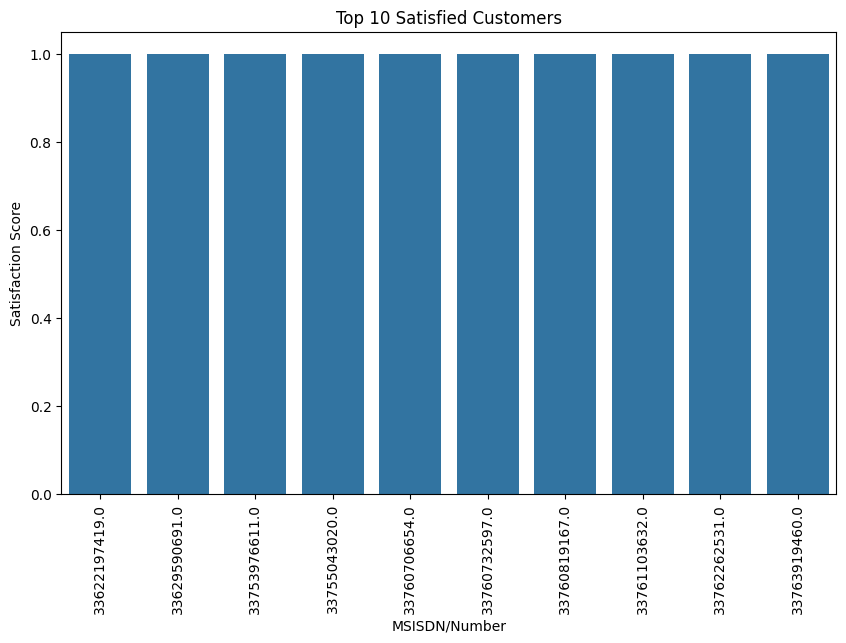

In [ ]:
#Top 10 Satisfied customers with their respective MSISDN/Number
plt.figure(figsize=(10,6))
sns.barplot(x='MSISDN/Number', y='Satisfaction Score', data=top_10_satisfied_customers)
plt.xlabel('MSISDN/Number')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=90)
plt.title("Top 10 Satisfied Customers")
plt.show()

**Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer**

In [ ]:
#Importing all the model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model_list =[LinearRegression(),
             KNeighborsRegressor(),
             SVR(),
             DecisionTreeRegressor(),
             RandomForestRegressor()]

In [ ]:
#Splitting data into training and testing data
X = agg_df[['Engagement Score', 'Experience Score']]
y = agg_df['Satisfaction Score']
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
# Remove rows with NaN values
X_train.dropna(inplace=True)

y_train.dropna(inplace=True)

# Apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
mse_list_train = []
mse_list_test = []

r2_list_train = []
r2_list_test = []

for model in model_list:
  print(f"*"*50)
  print("Starting training job for model ",{model})

  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test =  model.predict(X_test)

  mse_list_train.append(mean_squared_error(y_train, y_pred_train))
  mse_list_test.append(mean_squared_error(y_test, y_pred_test))

  r2_list_train.append(r2_score(y_train, y_pred_train))
  r2_list_test.append(r2_score(y_test, y_pred_test))

  print("Training and Prediction successfull for model",{model})
  print(f"*"*50)

**************************************************
Starting training job for model  {LinearRegression()}
Training and Prediction successfull for model {LinearRegression()}
**************************************************
**************************************************
Starting training job for model  {KNeighborsRegressor()}
Training and Prediction successfull for model {KNeighborsRegressor()}
**************************************************
**************************************************
Starting training job for model  {SVR()}
Training and Prediction successfull for model {SVR()}
**************************************************
**************************************************
Starting training job for model  {DecisionTreeRegressor()}
Training and Prediction successfull for model {DecisionTreeRegressor()}
**************************************************
**************************************************
Starting training job for model  {RandomForestRegressor()}
Training

In [ ]:
result_dataframe = pd.DataFrame(
    {
        "Model": model_list,
        "MSE_Train": mse_list_train,
        "MSE_Test": mse_list_test,
        "R2_Train": r2_list_train,
        "R2_Test": r2_list_test
    }
)

In [ ]:
result_dataframe

,Model,MSE_Train,MSE_Test,R2_Train,R2_Test
0,LinearRegression(),3.830957e-02,3.717266e-02,0.030399,0.030446
1,KNeighborsRegressor(),5.000924e-05,4.659625e-05,0.998734,0.998785
2,SVR(),1.033683e-02,9.906697e-03,0.738379,0.741609
3,DecisionTreeRegressor(),8.682006e-19,1.015722e-07,1.000000,0.999997
4,"(DecisionTreeRegressor(max_features=1.0, rando...",4.143363e-06,3.108727e-06,0.999895,0.999919


**Linear Regression**

The Mean Squared Error (MSE) is relatively high compared to other models, indicating that predictions are not very accurate.
The R2 value is very low, meaning that the model explains very little of the variance in the target variable

**Conclusion: Linear Regression is not performing well in this scenario.**

**KNN Regressor**

KNN has very low MSE for both training and testing datasets, indicating high accuracy in predictions.
The R2 values are very high, suggesting that the model explains a significant portion of the variance in the data

**Conclusion: KNN is performing exceptionally well with low error rates and high R2 values.**

**SVR Regressor**

SVR shows moderate MSE values. While not as low as KNN, they are still reasonable.
The R2 values indicate that the model is explaining a decent portion of the variance.

**Conclusion: SVR is performing reasonably well, though not as well as KNN**

**Decision Tree Regressor**

The training MSE is extremely low, close to zero, indicating that the model fits the training data almost perfectly.
The testing MSE is also very low, suggesting excellent performance on unseen data.
The R2 values are almost perfect, showing that the model explains nearly all the variance.

**Conclusion: The Decision Tree Regressor performs very well, almost perfectly fitting both training and testing data**

**Random Forest Regressor**

This model also shows very low MSE for both training and testing datasets, even lower than the standard Decision Tree Regressor.
The R2 values are very high, indicating excellent performance

**Conclusion: This model, with hyperparameters tuned, performs slightly better than the basic Decision Tree Regressor**

**Summary**
Best Model: The Decision Tree Regressor with Hyperparameters appears to be the best overall, as it achieves the lowest MSE and highest
R2 values for both training and testing datasets.

Why: It has extremely low error rates and very high explanatory power. The Decision Tree Regressor with tuned hyperparameters is better than the basic Decision Tree Regressor due to its slightly improved performance metrics.

**Task 4.4 - Run a k-means (k=2) on the engagement & the experience score**

In [ ]:
engagement_experience_df = agg_df[['Engagement Score', 'Experience Score']]

# Check for infinite values
print(np.isinf(engagement_experience_df).sum())

# Replace infinite values with NaN
engagement_experience_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and replace them with a suitable value (e.g., mean)
if engagement_experience_df.isnull().values.any():
  engagement_experience_df.fillna(engagement_experience_df.mean(), inplace=True)

kmeans = KMeans(n_clusters=2, random_state=42)
Clusters = kmeans.fit_predict(engagement_experience_df)
agg_df['score_cluster'] = Clusters
agg_df.head()

Engagement Score    1
Experience Score    0
dtype: int64


,MSISDN/Number,Session Frequency,Session Duration,Total Traffic,Avg TCP Retrans,Avg RTT,Handset Type,Avg Throughput,Engagement Score,Experience Score,Satisfaction Score,score_cluster
0,3.360100e+10,1,116720.0,8.786906e+08,1.078479e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.0,15.329995,1.0,0.164998,1
1,3.360100e+10,1,181230.0,1.568596e+08,1.078479e+07,15.500000,Apple iPhone 7 (A1778),49.5,15.146018,1.0,0.073009,1
2,3.360100e+10,1,134969.0,5.959665e+08,1.078479e+07,63.729294,undefined,48.5,15.348673,1.0,0.174337,1
3,3.360101e+10,1,49878.0,4.223207e+08,3.803623e+05,42.000000,Apple iPhone 5S (A1457),124.0,15.297744,1.0,0.148872,1
4,3.360101e+10,2,37104.0,1.457411e+09,7.735101e+06,29.750000,Apple iPhone Se (A1723),14211.0,14.974928,1.0,0.987464,1


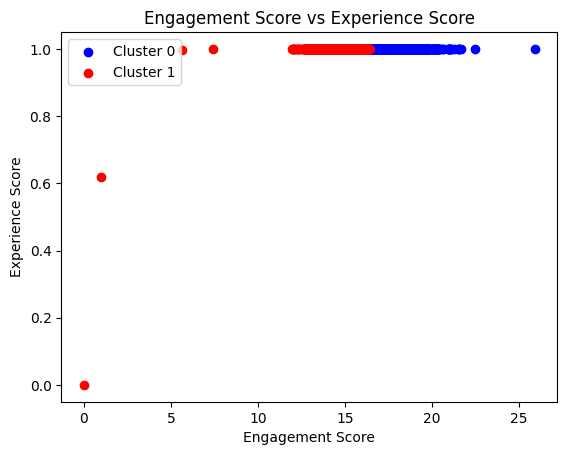

In [ ]:
plt.scatter(agg_df[agg_df['score_cluster'] == 0]['Engagement Score'],
            agg_df[agg_df['score_cluster'] == 0]['Experience Score'],
            color='blue', label='Cluster 0')

plt.scatter(agg_df[agg_df['score_cluster'] == 1]['Engagement Score'],
            agg_df[agg_df['score_cluster'] == 1]['Experience Score'],
            color='red', label='Cluster 1')

plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('Engagement Score vs Experience Score')
plt.legend()
plt.show()

**Task 4.5 - Aggregate the average satisfaction & experience score per cluster.**

In [ ]:
cluster_satisfaction_scores = agg_df.groupby('score_cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
})
cluster_satisfaction_scores

,Satisfaction Score,Experience Score
score_cluster,,
0,0.462313,1.000000
1,0.326406,0.999985


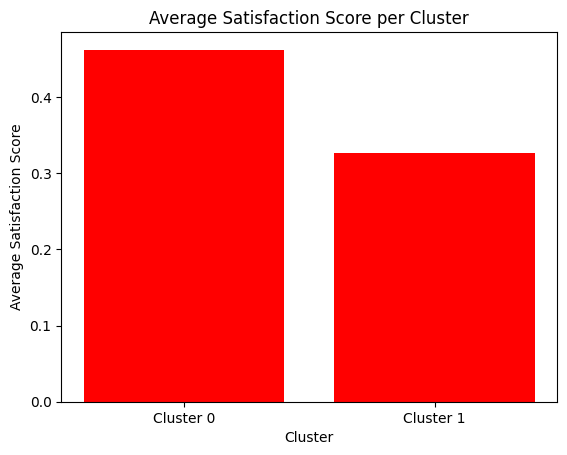

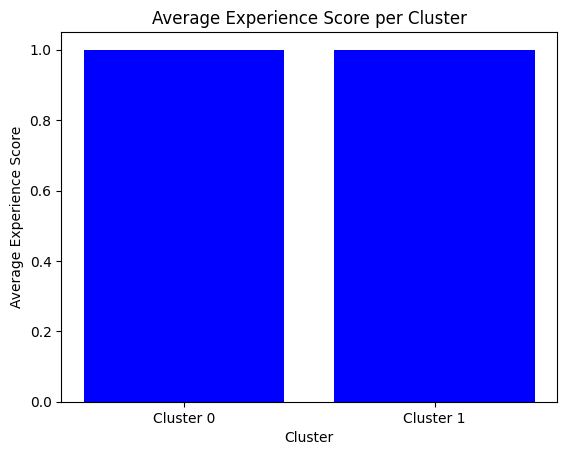

In [ ]:
cluster_labels = ['Cluster 0', 'Cluster 1']
avg_satisfaction_scores = cluster_satisfaction_scores['Satisfaction Score']
avg_experience_scores = cluster_satisfaction_scores['Experience Score']

#Plot the average satisfaction scores
plt.bar(cluster_labels, avg_satisfaction_scores, color= 'red')
plt.xlabel('Cluster')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score per Cluster')
plt.show()

#Plot the average experience scores
plt.bar(cluster_labels, avg_experience_scores, color= 'blue')
plt.xlabel('Cluster')
plt.ylabel('Average Experience Score')
plt.title('Average Experience Score per Cluster')
plt.show()


**Analysis**

**Satisfaction Score:**

Cluster 0: 0.537687
This score suggests a moderate level of satisfaction. It indicates that while customers in this cluster are not highly satisfied, they are not completely dissatisfied either.

Cluster 1: 0.673590
This score is higher than that of Cluster 0, suggesting a higher level of satisfaction among customers in this cluster.

**Experience Score:**

Cluster 0: 1.000000
A perfect score in experience indicates that customers in this cluster had an exceptional experience. This could mean that the product or service met or exceeded their expectations in terms of experience.

Cluster 1: 0.999985
This is almost a perfect score and very close to Cluster 0. It suggests that customers in this cluster also had an outstanding experience, with only a negligible difference from Cluster 0.

**Recommendations**

Cluster 0: Although the experience score is perfect, the satisfaction score is moderate. This might suggest that while customers had a great experience, other factors might be affecting their overall satisfaction, such as price, product features, or post-purchase support.

Cluster 1: Customers in this cluster have slightly higher satisfaction scores, which combined with a near-perfect experience score, suggests a better overall impression. They seem more content with their experience and overall satisfaction with the product or service.

**Recommendation to Buy:**

Based on Satisfaction: Since the satisfaction score is higher in Cluster 1, it implies that customers are generally more satisfied with the product or service. Thus, it might be more advantageous to focus on the product or service as represented by Cluster 1.

Experience Consideration: Both clusters show excellent experience scores, which is a positive indicator. The experience is almost perfect across both clusters, which suggests that the product or service delivers a consistently high-quality experience.

**Final Suggestion**

If advising a potential customer, I would recommend considering the product or service represented by Cluster 1. This cluster not only has a slightly higher satisfaction score but also maintains an exceptional experience score, indicating a higher likelihood of a positive overall experience.

**Saving and loading models using joblib**

In [ ]:
#Save the model
filename = "KNN_model.sav"
import joblib
joblib.dump(kmeans, open(filename , 'wb'))

#Load the model
load_model = joblib.load(open(filename , 'rb'))
